In [1]:
import numpy as np      
import pandas as pd     
from pandas.plotting import autocorrelation_plot as auto_corr
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns
import math
from datetime import datetime
from datetime import timedelta 
from pandas import DataFrame

In [2]:
data = pd.read_csv("Walmart.csv")

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
store_date_table = pd.pivot_table(data, index='Date', columns='Store',values='Weekly_Sales', aggfunc=np.mean)
display(store_date_table)

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
01-04-2011,1495064.75,1800171.36,374556.08,1900246.47,314316.55,1459276.77,513409.67,878762.30,520962.14,1827733.18,...,385672.11,534578.78,382098.13,1316849.36,841889.08,1179125.48,508432.17,611585.54,281514.26,712425.76
01-06-2012,1624477.58,1910092.37,432268.53,2179360.94,359867.80,1681121.38,598495.02,921161.20,583648.59,1767471.48,...,306005.53,531811.85,435579.70,1640476.77,1037464.27,1374891.36,521953.78,605078.62,323410.94,837144.63
01-07-2011,1488538.09,1866243.00,368962.72,2051533.53,327093.89,1694551.15,704344.21,883683.35,537064.03,1751369.75,...,354270.77,517021.30,387334.04,1429829.36,1048866.30,1333347.78,506343.83,586781.78,315273.08,791495.25
01-10-2010,1453329.50,1827440.43,358784.10,1842821.02,283178.12,1328468.89,448998.73,804105.49,495692.19,1645892.97,...,422169.47,529877.93,360256.58,1219583.91,891152.33,1109216.35,481523.93,657108.77,300152.45,690007.76
02-03-2012,1688420.76,1952555.66,469752.56,2206319.90,359206.21,1550385.65,551058.13,952264.91,619498.28,1990371.02,...,315396.72,525559.17,471115.38,1453047.02,927732.02,1239813.26,585895.34,693249.98,316687.22,782796.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-07-2010,1371986.60,1804246.16,347955.05,1796637.61,268929.03,1532308.78,603547.16,787295.09,468675.19,1832664.03,...,432451.91,487912.95,336378.38,1308222.24,953393.02,1211136.63,469598.57,622112.23,275020.96,716859.27
30-09-2011,1394561.83,1650394.44,368477.93,1929486.63,292315.38,1307551.92,488880.26,809049.37,508567.04,1627707.31,...,314910.37,516402.10,366819.84,1311775.83,912857.10,1160619.61,510243.79,555183.72,299757.75,698986.34
30-12-2011,1497462.72,1874226.52,410553.88,2007105.86,349624.88,1598080.52,815915.52,858572.22,549788.36,1930690.37,...,287425.22,451327.61,342667.35,1537139.56,908853.15,1264014.16,454412.28,505405.85,263917.85,869403.63


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

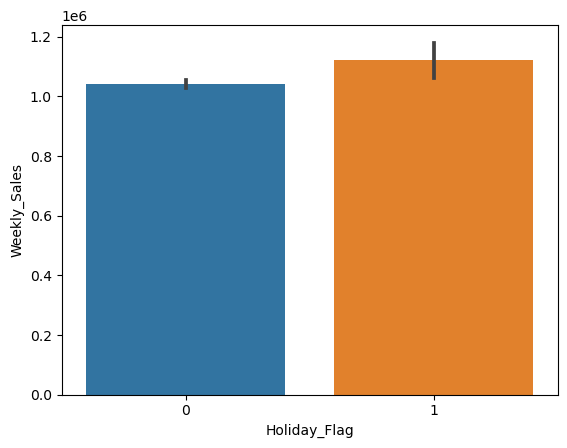

In [6]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data)

In [7]:
holiday = data.loc[data['Holiday_Flag']==True]
holiday['Date'].unique()

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

In [8]:
data.loc[(data['Date'] == '12-02-2010')|(data['Date'] == '11-02-2011')|(data['Date'] == '10-02-2012'),'Super_Bowl'] = True
data.loc[(data['Date'] != '12-02-2010')&(data['Date'] != '11-02-2011')&(data['Date'] != '10-02-2012'),'Super_Bowl'] = False 
data.loc[(data['Date'] == '10-09-2010')|(data['Date'] == '09-09-2011')|(data['Date'] == '07-09-2012'),'Labor_Day'] = True
data.loc[(data['Date'] != '10-09-2010')&(data['Date'] != '09-09-2011')&(data['Date'] != '07-09-2012'),'Labor_Day'] = False 
data.loc[(data['Date']=='26-11-2010')|(data['Date']=='25-11-2011'), 'Thanksgiving']=True   
data.loc[(data['Date']!='26-11-2010')&(data['Date']!='25-11-2011'), 'Thanksgiving']= False 
data.loc[(data['Date']=='31-12-2010')|(data['Date']=='30-12-2011'), 'Christmas']=True   
data.loc[(data['Date']!='31-12-2010')&(data['Date']!='30-12-2011'), 'Christmas']= False 

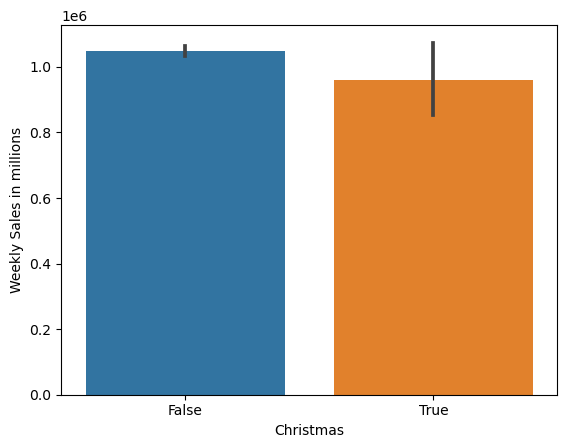

In [13]:
a=sns.barplot(x='Christmas', y='Weekly_Sales', data=data)
a.set(xlabel="Christmas", ylabel="Weekly Sales in millions")
plt.show()

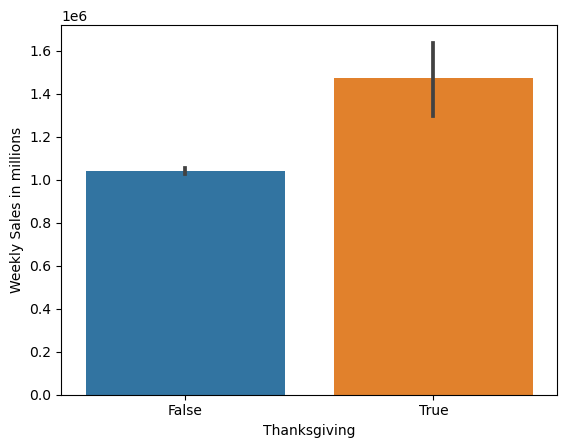

In [14]:
b=sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data)  
b.set(xlabel="Thanksgiving", ylabel="Weekly Sales in millions")
plt.show()

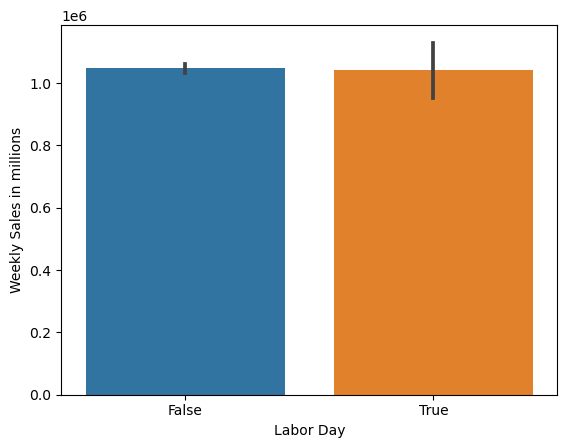

In [15]:
c=sns.barplot(x='Labor_Day', y='Weekly_Sales', data=data)  
c.set(xlabel="Labor Day", ylabel="Weekly Sales in millions")
plt.show()

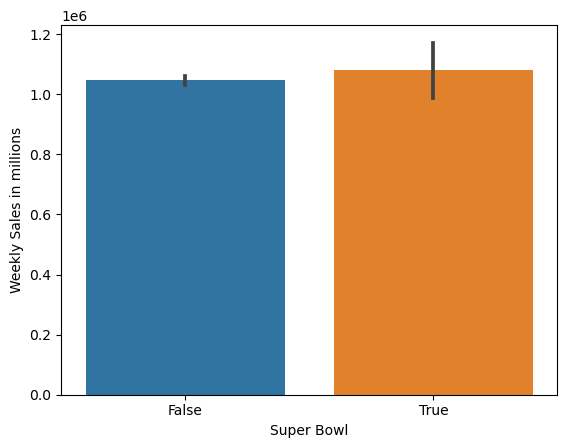

In [16]:
d=sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data) 
d.set(xlabel="Super Bowl", ylabel="Weekly Sales in millions")
plt.show()

In [17]:
data.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724,False,False,False,False
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484,False,False,False,False
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003,False,False,False,False
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143,False,False,False,False
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795,False,False,False,False


In [32]:
data['Date'] = pd.to_datetime(data['Date'])
data['Week'] = data['Date'].dt.isocalendar().week 
data['month'] =data['Date'].dt.month 
data['year'] =data['Date'].dt.year

In [33]:
Avg_monthly_sale=data.groupby('month')['Weekly_Sales'].mean()     
print(Avg_monthly_sale)

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64


<Axes: xlabel='Month', ylabel='Total Sales in Millions'>

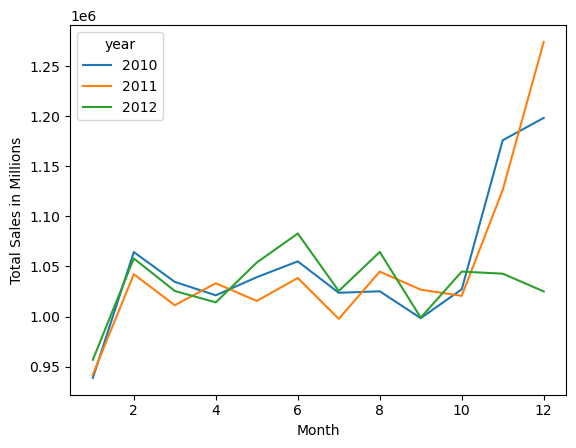

In [34]:
monthly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot(xlabel = 'Month', ylabel='Total Sales in Millions')

    Store  Lifetime_Sales
0       1    2.224028e+08
1       2    2.753824e+08
2       3    5.758674e+07
3       4    2.995440e+08
4       5    4.547569e+07
5       6    2.237561e+08
6       7    8.159828e+07
7       8    1.299512e+08
8       9    7.778922e+07
9      10    2.716177e+08
10     11    1.939628e+08
11     12    1.442872e+08
12     13    2.865177e+08
13     14    2.889999e+08
14     15    8.913368e+07
15     16    7.425243e+07
16     17    1.277821e+08
17     18    1.551147e+08
18     19    2.066349e+08
19     20    3.013978e+08
20     21    1.081179e+08
21     22    1.470756e+08
22     23    1.987506e+08
23     24    1.940160e+08
24     25    1.010612e+08
25     26    1.434164e+08
26     27    2.538559e+08
27     28    1.892637e+08
28     29    7.714155e+07
29     30    6.271689e+07
30     31    1.996139e+08
31     32    1.668192e+08
32     33    3.716022e+07
33     34    1.382498e+08
34     35    1.315207e+08
35     36    5.341221e+07
36     37    7.420274e+07
37     38   

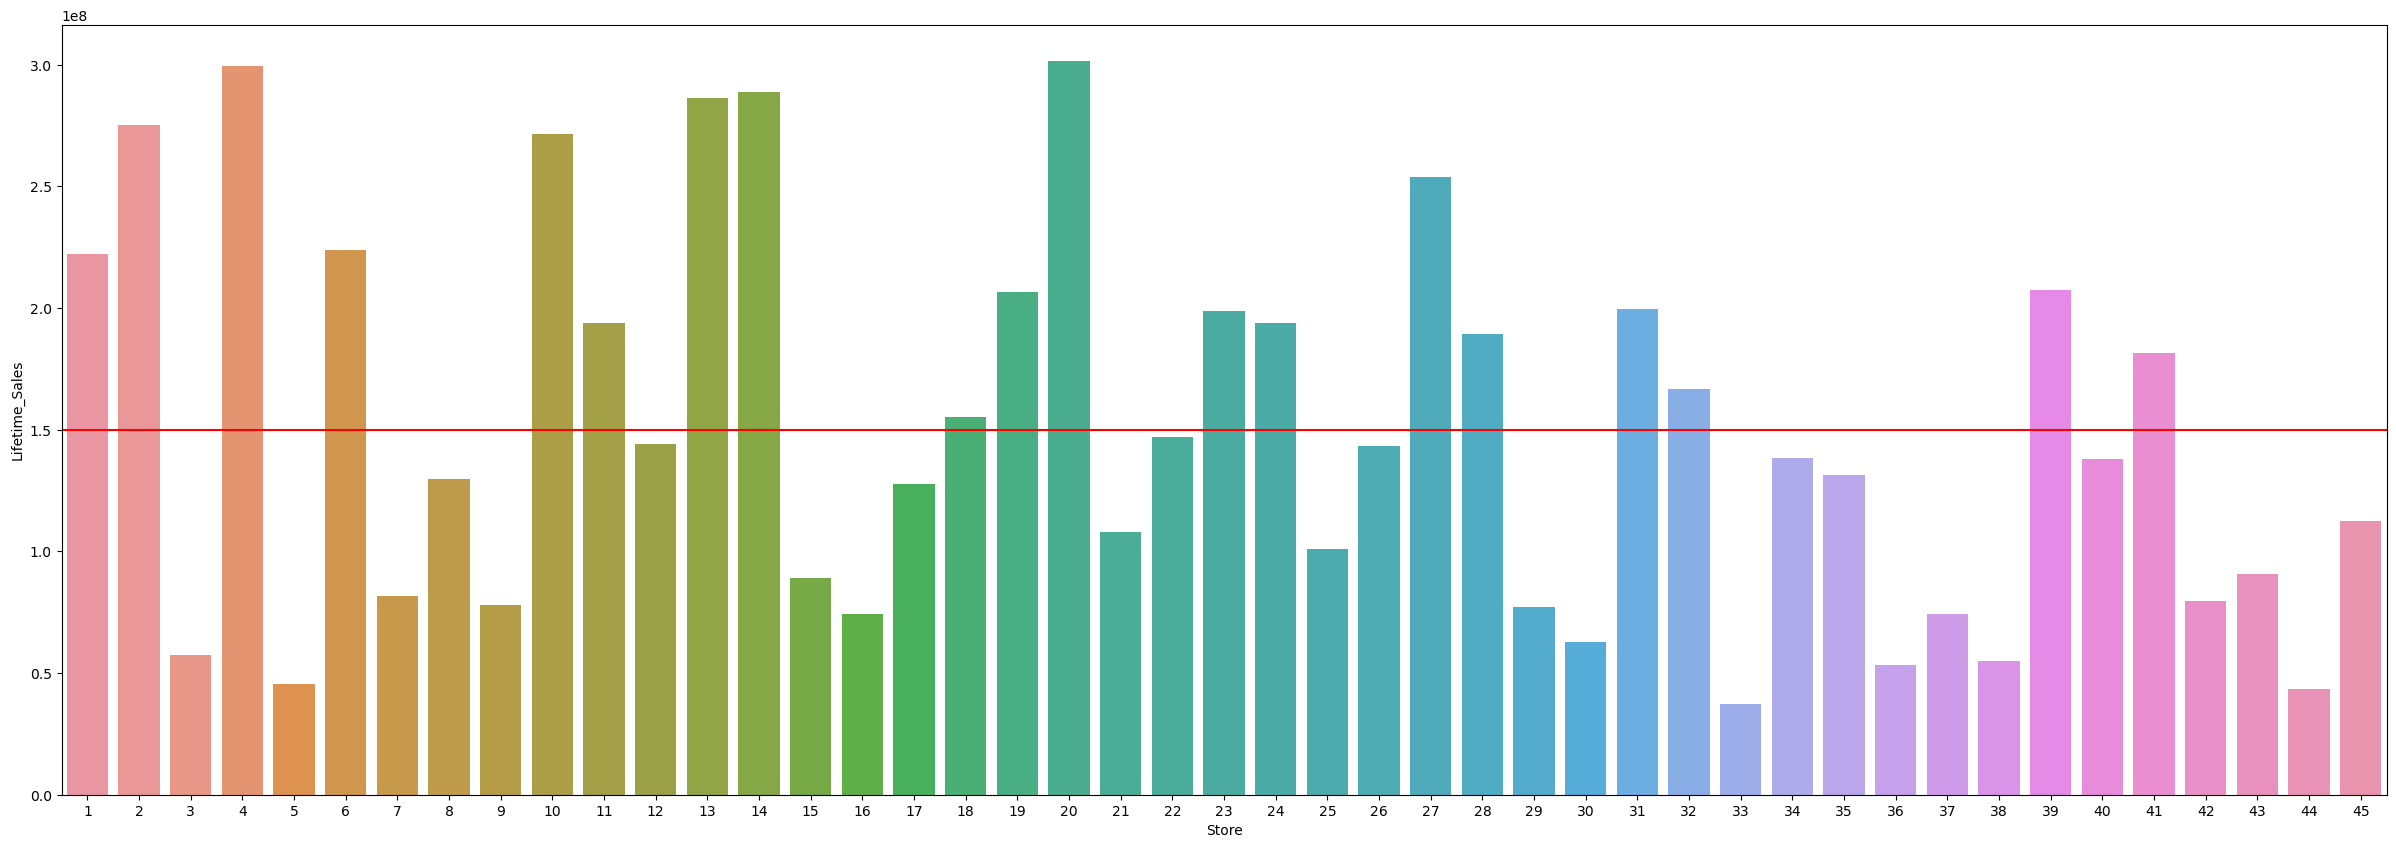

In [42]:
store_lifetime_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()  
store_lifetime_sales.columns = ['Store', 'Lifetime_Sales']
print(store_lifetime_sales)  
LifetimeSales_mean = (store_lifetime_sales["Lifetime_Sales"].mean())
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Lifetime_Sales', data= store_lifetime_sales)
fig.axhline(LifetimeSales_mean, color='red', label='Avg') 
plt.show(fig)

In [26]:
fuel_price = pd.pivot_table(data, values = "Weekly_Sales", index= "Fuel_Price") 
fuel_price

,Weekly_Sales
Fuel_Price,
2.472,4.702810e+05
2.513,4.344714e+05
2.514,1.015099e+06
2.520,4.475194e+05
2.533,4.312945e+05
...,...
4.294,8.758470e+05
4.301,8.531141e+05
4.308,8.875630e+05


In [27]:
weekly_sales_total = data.groupby('Week')['Weekly_Sales'].sum().reset_index()
weekly_sales_total

,Week,Weekly_Sales
0,1,1.815590e+08
1,2,8.269676e+07
2,3,8.273564e+07
3,4,7.943483e+07
4,5,1.462024e+08
5,6,9.476718e+07
6,7,1.471902e+08
7,8,1.338659e+08
8,9,9.485760e+07
9,10,1.445892e+08


In [28]:
weekly_fuel_average = data.groupby('Week')['Fuel_Price'].mean().reset_index() 
weekly_fuel_average

,Week,Fuel_Price
0,1,3.440872
1,2,3.237822
2,3,3.259344
3,4,3.273122
4,5,3.105622
5,6,3.522833
6,7,3.139052
7,8,3.172207
8,9,3.644133
9,10,3.065696


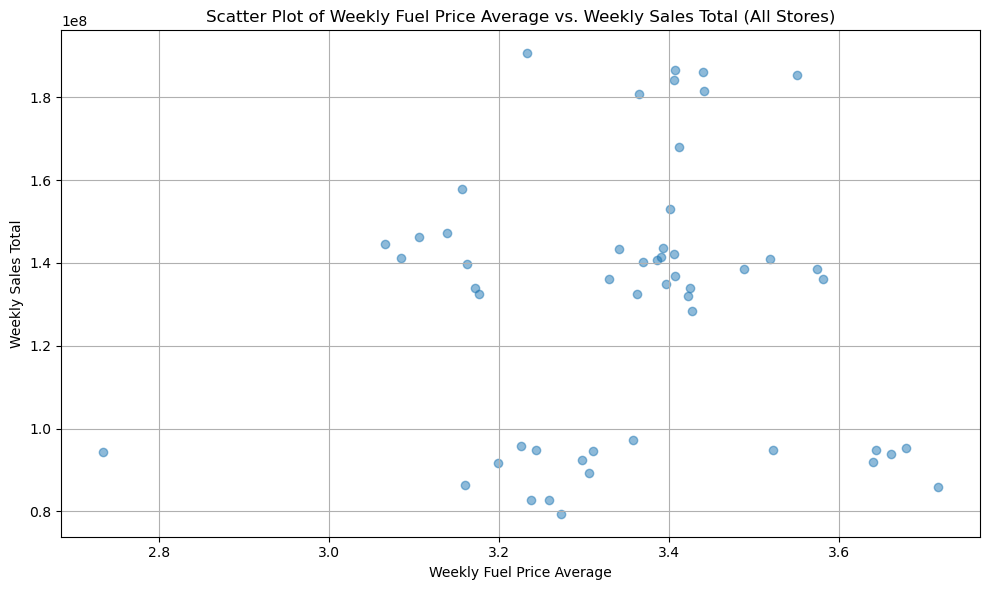

In [29]:
merged_data = weekly_fuel_average.merge(weekly_sales_total, on='Week', how='inner')
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.scatter(merged_data['Fuel_Price'], merged_data['Weekly_Sales'], alpha=0.5)
plt.xlabel('Weekly Fuel Price Average')
plt.ylabel('Weekly Sales Total')
plt.title('Scatter Plot of Weekly Fuel Price Average vs. Weekly Sales Total (All Stores)')
plt.grid(True) 
plt.tight_layout()  
plt.show()

<Figure size 1000x600 with 0 Axes>

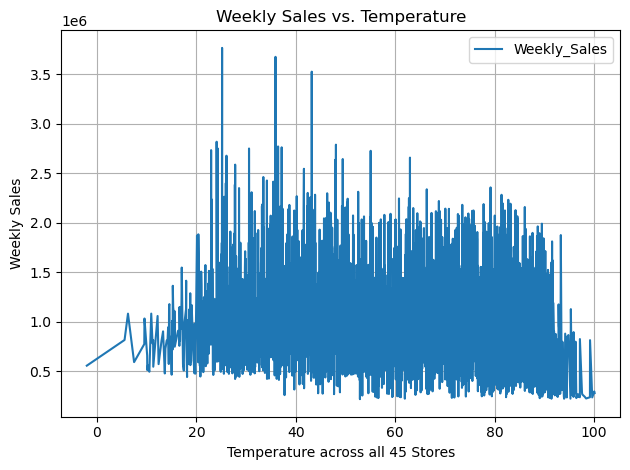

In [30]:
temperature = pd.pivot_table(data, values = "Weekly_Sales", index= "Temperature")
plt.figure(figsize=(10, 6))
temperature.plot() 
plt.xlabel('Temperature across all 45 Stores')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Temperature')


plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

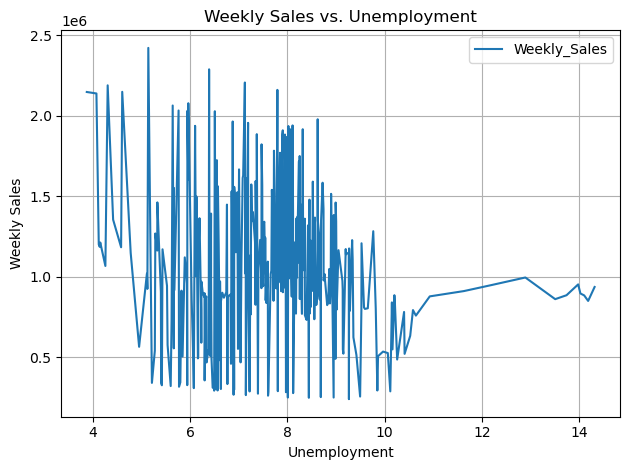

In [31]:
Unemployment = pd.pivot_table(data, values = 'Weekly_Sales', index='Unemployment') 
plt.figure(figsize=(10, 6))
Unemployment.plot() 
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Unemployment')

plt.grid(True)
plt.tight_layout()
plt.show()